In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Read the Data
This data was imported from the Machine Learning Repository from UCI. They have some extremely interesting data sets, and it serves as great practice for cleansing, visualizing, and creating models for data.

In [2]:
df = pd.read_excel('ChronicKidneyDisease.xlsx')

In [3]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,Chronic Kid,Unnamed: 25
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,NaN
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,NaN
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,NaN
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,NaN
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,NaN


# Visualizing Data to see Null and blank values

In [4]:
missing_values = ['?']
df = pd.read_excel('ChronicKidneyDisease.xlsx',na_values=missing_values)

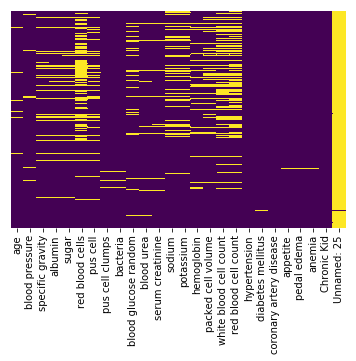

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['blood pressure'].fillna(df['blood pressure'].mean(),inplace=True)
df['specific gravity'].fillna(df['specific gravity'].mean(),inplace=True)
df['albumin'].fillna(df['albumin'].median(),inplace=True)
df['sugar'].fillna(df['sugar'].median(),inplace=True)
df['packed cell volume'].fillna(df['packed cell volume'].median(),inplace=True)
df['hemoglobin'].fillna(df['hemoglobin'].median(),inplace=True)
df['potassium'].fillna(df['potassium'].median(),inplace=True)
df['sodium'].fillna(df['sodium'].median(),inplace=True)
df['serum creatinine'].fillna(df['serum creatinine'].median(),inplace=True)
df['blood urea'].fillna(df['blood urea'].median(),inplace=True)
df['blood glucose random'].fillna(df['blood glucose random'].median(),inplace=True)

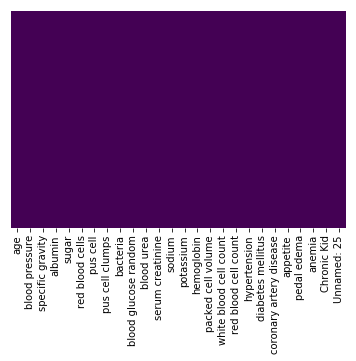

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df = df.fillna(df['pus cell'].value_counts().index[0])

In [29]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hemoglobin,packed cell volume,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,Chronic Kid,Unnamed: 25
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,15.4,44.0,yes,yes,no,good,no,no,ckd,normal
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,11.3,38.0,no,no,no,good,no,no,ckd,normal
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,no,yes,no,poor,no,yes,ckd,normal
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,yes,no,no,poor,yes,yes,ckd,normal
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,no,no,no,good,no,no,ckd,normal


# Creating a Label Encoder so that the Random Forest Classifier is able to process the Data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
cod = LabelEncoder()

In [21]:
df.drop(['red blood cell count'],axis=1,inplace=True)

In [27]:
fitted_df = df.apply(cod.fit_transform)

In [52]:
fitted_df.head(5)

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hemoglobin,packed cell volume,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,Chronic Kid,Unnamed: 25
0,39,4,4,1,0,1,1,1,1,48,...,90,31,2,3,0,0,1,0,0,0
1,4,0,4,4,0,1,1,1,1,48,...,49,25,0,1,0,0,1,0,0,0
2,54,4,1,2,3,1,1,1,1,138,...,32,18,0,3,0,3,1,2,0,0
3,39,2,0,4,0,1,0,2,1,44,...,48,19,2,1,0,3,3,2,0,0
4,42,4,1,2,0,1,1,1,1,33,...,52,22,0,1,0,0,1,0,0,0


# Exploratory Data Analysis

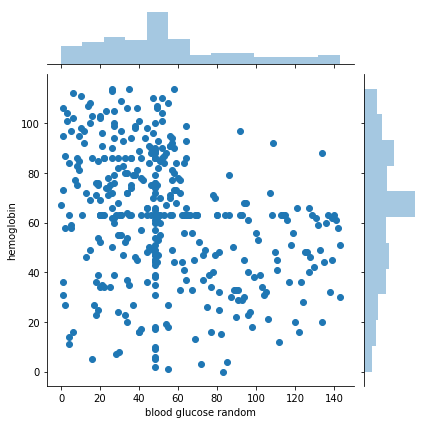

In [47]:
sns.jointplot('blood glucose random','hemoglobin',data=fitted_df)

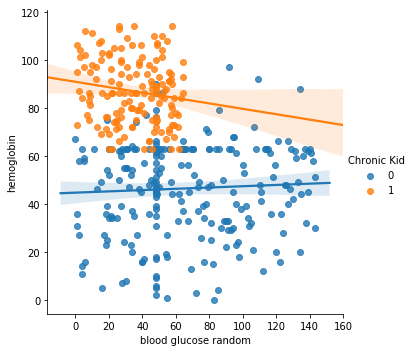

In [56]:
sns.lmplot('blood glucose random','hemoglobin',data=fitted_df,hue='Chronic Kid')

# Implementing a Random Forest Classifier

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = fitted_df.drop('Chronic Kid',axis=1)
y = fitted_df['Chronic Kid']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier()

In [36]:
rfc.fit(X_train,y_train)

/Users/anthonyramies/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
pred = rfc.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

# Results!

In [40]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        80
           1       0.98      0.94      0.96        48

   micro avg       0.97      0.97      0.97       128
   macro avg       0.97      0.96      0.97       128
weighted avg       0.97      0.97      0.97       128

[[79  1]
 [ 3 45]]
